ML Project


*   Abhishek Sharma
*   Aditya Vatsa
*   Amrith J Ajith





# Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Loading Data

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=12fBlhsa5GIdtme1jT3KlPPIgIdjzqhv1'
df = pd.read_json(url, lines= True,orient='columns')
df.head

<bound method NDFrame.head of                                                  content  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  
0      {'notes': '', 'label': ['1']}     NaN  
1      {'notes': '', 'label': ['1']}     NaN  
2      {'notes': '', 'label': ['1']}     NaN  
3      {'notes': '', 'label': ['1']}     NaN  
4      {'notes

In [ ]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

<ipython-input-4-63a5844c426a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 1
<ipython-input-4-63a5844c426a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0


In [ ]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
df.shape 

(20001, 2)

# Visualization

<Axes: >

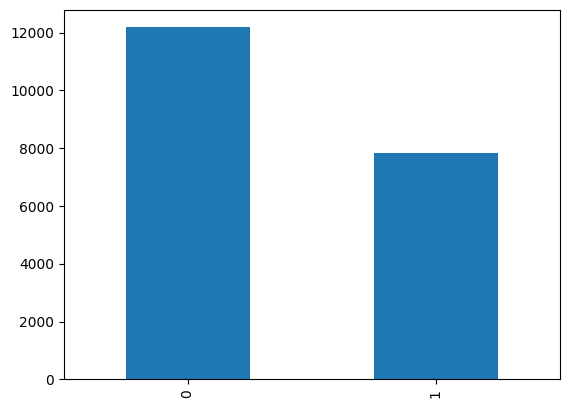

In [ ]:
df['annotation'].value_counts().sort_index().plot.bar()

In [ ]:
#Biasness
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


# Preprocessing

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [ ]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [ ]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [ ]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [ ]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


In [ ]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names_out())
print(dfx)

        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

In [ ]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [ ]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.37790877127185
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.19747902607998
what                                               Score: 221.43673623523864
know  

In [ ]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
print(print(X[0], y[0]))
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

[0. 0. 0. ... 0. 0. 0.] 1
None
(16000, 14783)
(16000,)
(4001, 14783)
(4001,)


In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 6250]]


In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2429 1572]]


In [ ]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(19500, 14783)
(19500,)


In [ ]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 9750]]


# Training and Calculating Scores

In [ ]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = PrecisionRecallDisplay.from_predictions(y_pred, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

## Normal Methods

## Ensemble Methods

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Score: 0.9167708072981755
Confusion Matrix: 
 [[2171  258]
 [  75 1497]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2429
           1       0.85      0.95      0.90      1572

    accuracy                           0.92      4001
   macro avg       0.91      0.92      0.91      4001
weighted avg       0.92      0.92      0.92      4001



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


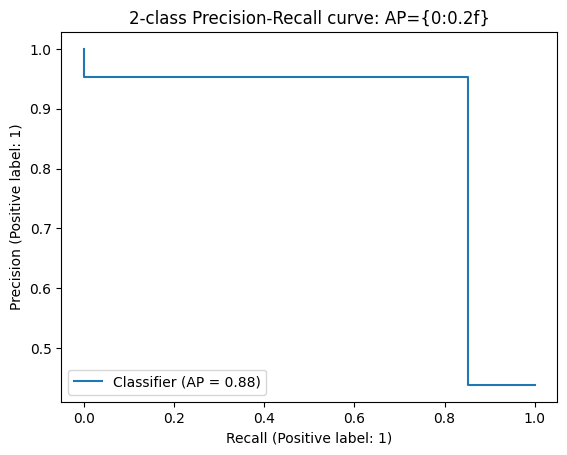

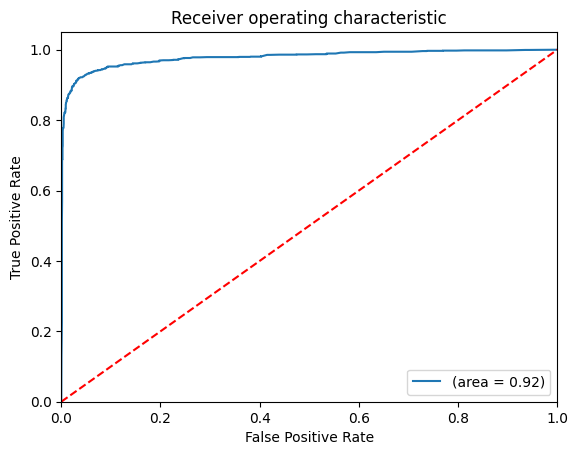

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)
print(X_test)

In [ ]:
import pickle

with open('model.pickle', 'wb') as fd:

  pickle.dump(rfcmodel, fd)

In [ ]:
# Assume you have a new data point stored in a variable `new_data`
new_data = "This is Cyber Bullying Project"

# Preprocess the input data to match the format used for training
new_data = ' '.join([word for word in new_data.split() if word not in (stop)])
new_data = regex.sub('',new_data)
nltk_tokens = nltk.word_tokenize(new_data)
final = ''
for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
new_data = ''.join([i for i in final if not i.isdigit()])

# Convert the preprocessed input data to a format compatible with the trained model
new_data_vectorized = tfIdfVectorizer.transform([new_data])

# Make a prediction using the trained model
prediction = rfcmodel.predict(new_data_vectorized.toarray())
print(prediction)

[0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
with open("tokenizer.pickle", 'wb') as fd:

  pickle.dump(tfIdfVectorizer, fd)